<a href="https://colab.research.google.com/github/Abhiram-k1/Elevvo-ML-internship/blob/main/Elevvo_level_1_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.
First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_

/tmp/ipython-input-2860539605.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2860539605.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

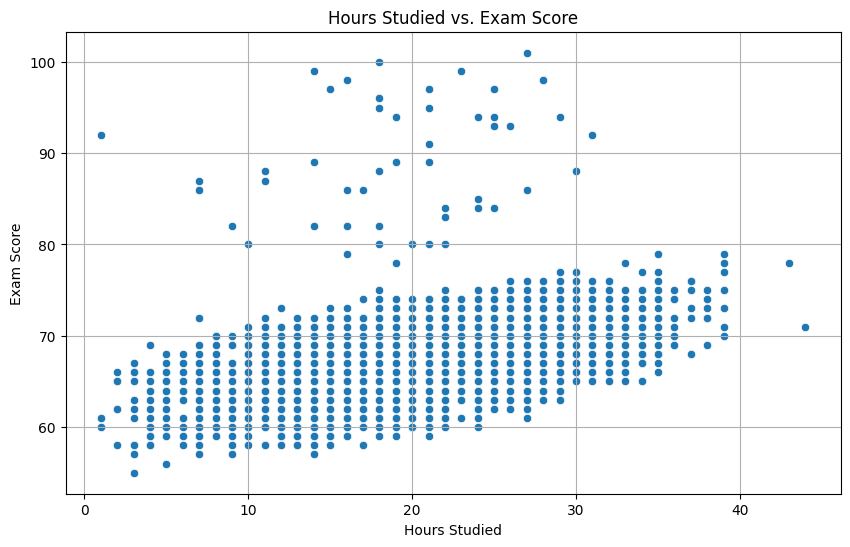

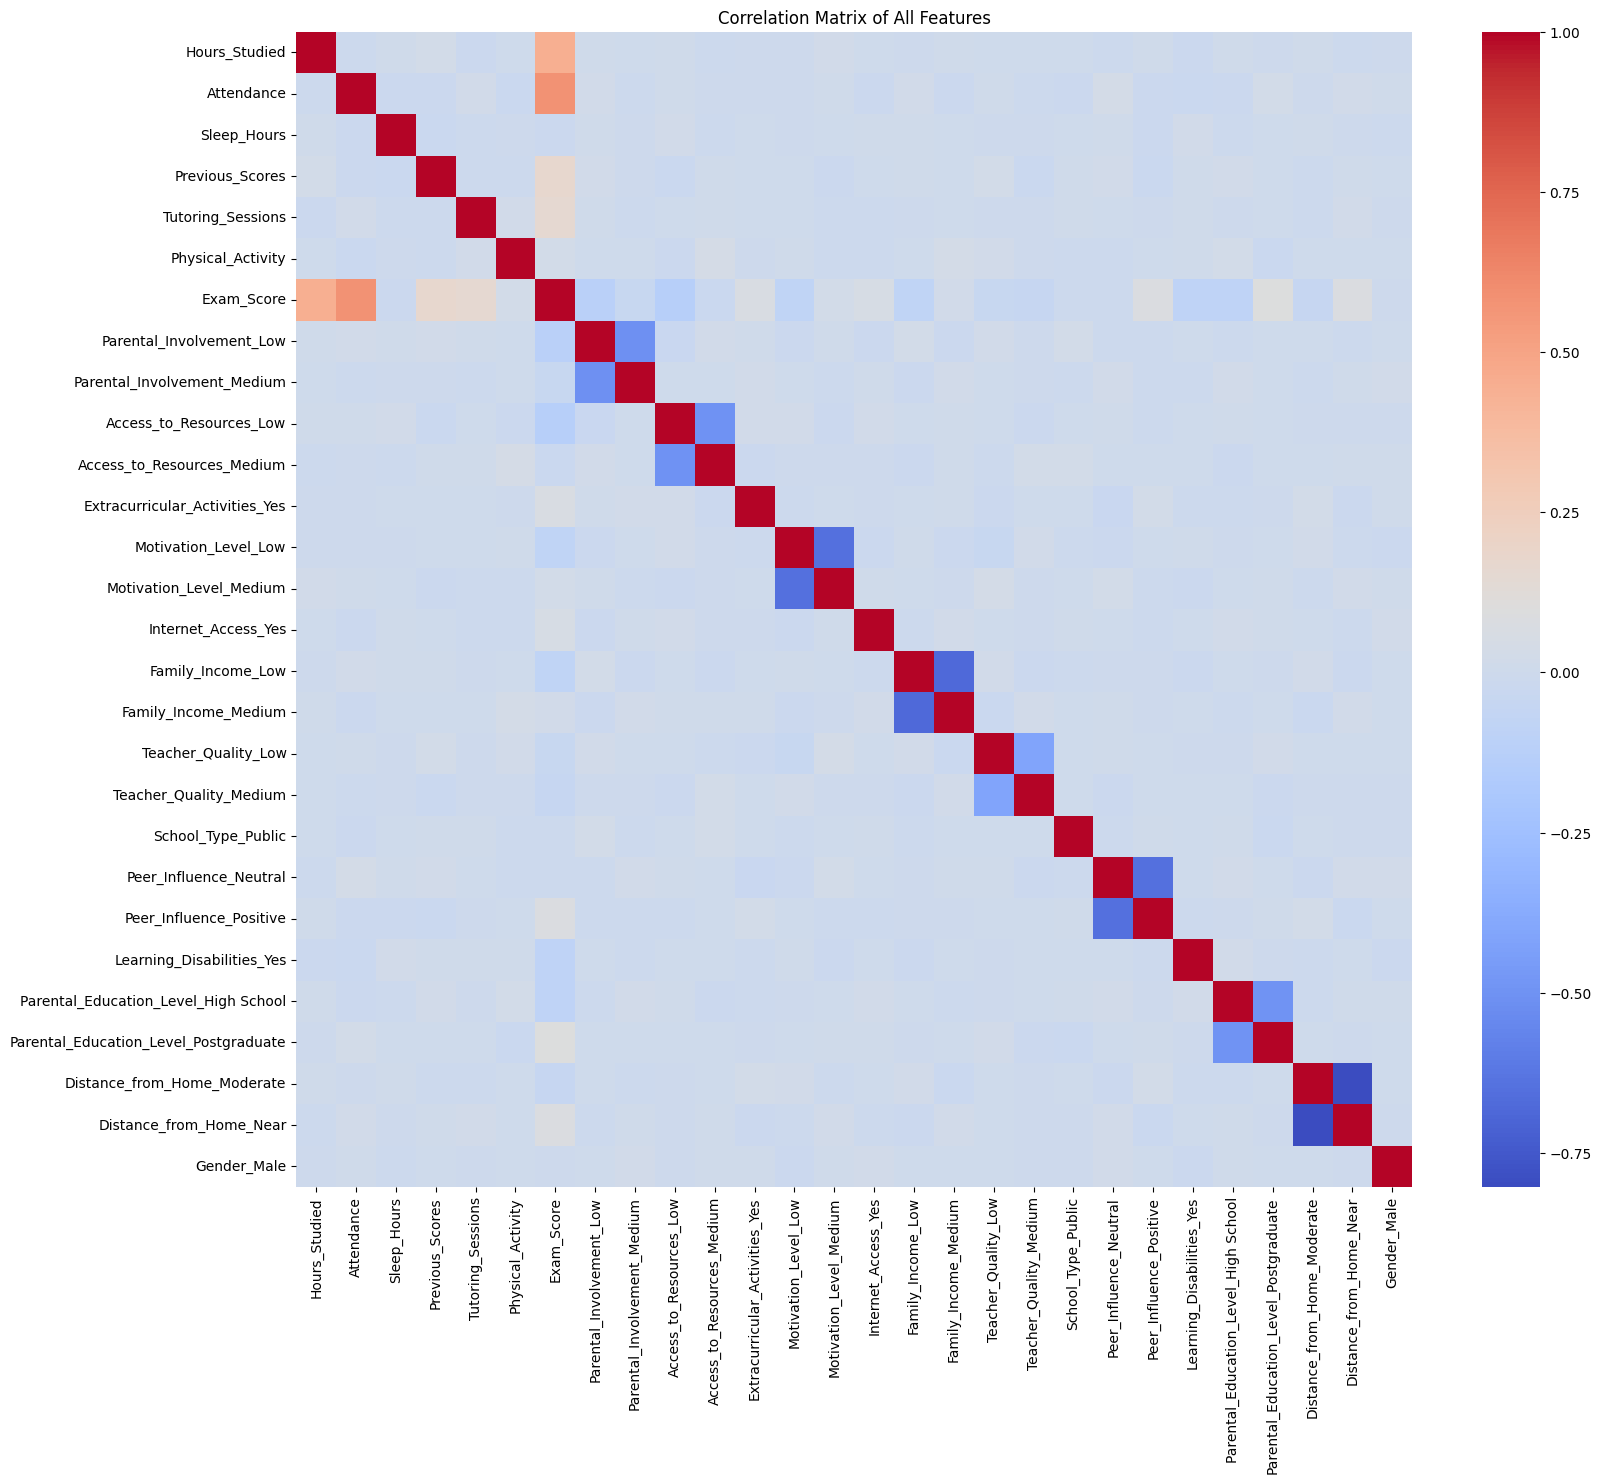


--- Training a Simple Linear Regression Model ---
Simple Linear Regression model trained.

--- Evaluating Simple Linear Regression Model ---
Mean Absolute Error (MAE): 2.45
Mean Squared Error (MSE): 10.86
R-squared: 0.23


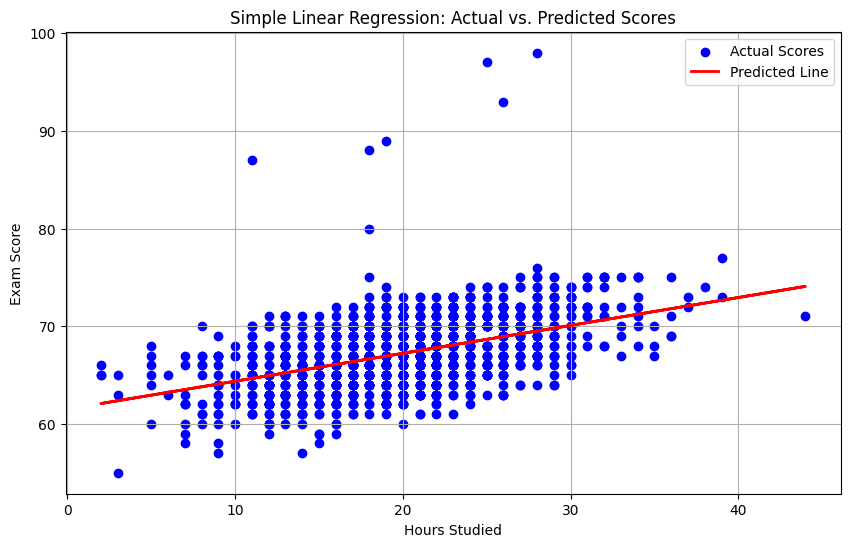


--- Bonus: Training a Polynomial Regression Model ---
Polynomial Regression model trained.

--- Evaluating Polynomial Regression Model ---
Mean Absolute Error (MAE): 2.44
Mean Squared Error (MSE): 10.84
R-squared: 0.23


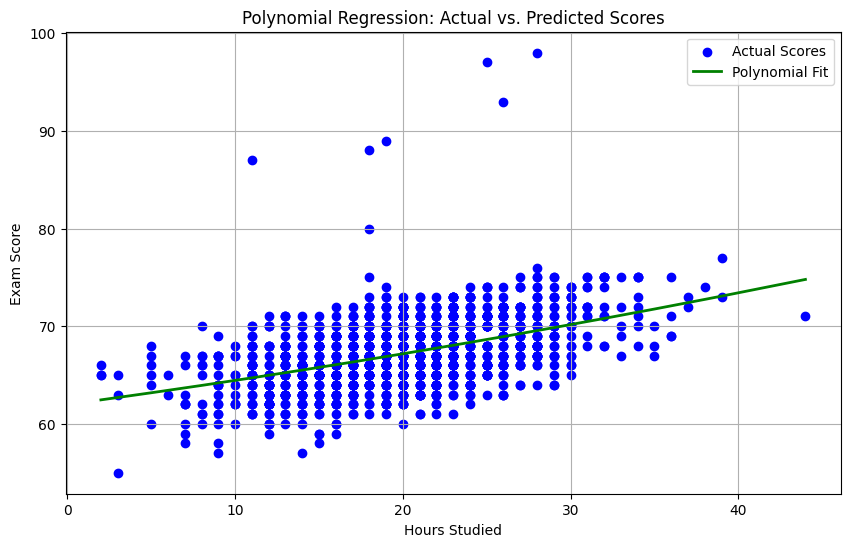


--- Bonus: Training a Multiple Linear Regression Model ---
Multiple Linear Regression model trained.

--- Evaluating Multiple Linear Regression Model ---
Mean Absolute Error (MAE): 1.36
Mean Squared Error (MSE): 5.35
R-squared: 0.62

--- Model Performance Comparison ---
              Model  R-squared       MAE        MSE
0     Simple Linear   0.231987  2.447569  10.855921
1  Polynomial (d=2)   0.232760  2.444780  10.844988
2   Multiple Linear   0.621809  1.360889   5.345751

Conclusion: The Multiple Linear Regression model performed the best, indicated by the highest R-squared value and the lowest MAE and MSE. This shows that including other relevant factors like previous scores and attendance can significantly improve the prediction of exam scores.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Load and Understand the Data ---
# Load the dataset from the CSV file into a pandas DataFrame.
try:
    df = pd.read_csv('StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    df.info()
except FileNotFoundError:
    print("Error: StudentPerformanceFactors.csv not found. Please make sure the file is in the correct directory.")
    exit()


# --- 2. Data Cleaning and Preprocessing ---
# Check for any missing values in the dataset.
print("\nMissing values per column:")
print(df.isnull().sum())

# The output shows some columns have missing values.
# For simplicity, we'll fill numerical columns with the median and categorical with the mode.
for col in df.columns:
    if df[col].dtype == 'object':
        # Fill categorical columns with the mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # Fill numerical columns with the median
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values handled. Checking again:")
print(df.isnull().sum().sum()) # Should be 0

# Convert categorical variables to numerical ones using one-hot encoding.
# This is necessary for the regression models to process the data.
df_processed = pd.get_dummies(df, drop_first=True)
print("\nDataset after one-hot encoding (first 5 rows):")
print(df_processed.head())


# --- 3. Basic Data Visualization ---
# Use a scatter plot to visualize the relationship between hours studied and exam score.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

# Use a heatmap to see the correlation between all numerical features.
plt.figure(figsize=(18, 15))
sns.heatmap(df_processed.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()


# --- 4. Simple Linear Regression (Hours_Studied vs. Exam_Score) ---
print("\n--- Training a Simple Linear Regression Model ---")

# Define features (X) and target (y)
X_simple = df_processed[['Hours_Studied']]
y_simple = df_processed['Exam_Score']

# Split the dataset into training (80%) and testing (20%) sets.
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and train the linear regression model.
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
print("Simple Linear Regression model trained.")

# Make predictions on the test set.
y_pred_s = model_simple.predict(X_test_s)


# --- 5. Evaluate the Simple Linear Regression Model ---
print("\n--- Evaluating Simple Linear Regression Model ---")
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Mean Absolute Error (MAE): {mae_s:.2f}")
print(f"Mean Squared Error (MSE): {mse_s:.2f}")
print(f"R-squared: {r2_s:.2f}")


# --- 6. Visualize the Simple Linear Regression Predictions ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Scores')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted Line')
plt.title('Simple Linear Regression: Actual vs. Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()


# --- 7. Bonus: Polynomial Regression ---
print("\n--- Bonus: Training a Polynomial Regression Model ---")

# Create polynomial features (degree=2). This will transform 'Hours_Studied' into a set of polynomial terms.
poly = PolynomialFeatures(degree=2)
X_poly_s = poly.fit_transform(X_simple)

# Split the transformed data
X_train_poly_s, X_test_poly_s, y_train_poly_s, y_test_poly_s = train_test_split(X_poly_s, y_simple, test_size=0.2, random_state=42)

# Train a new linear regression model on the polynomial features.
model_poly = LinearRegression()
model_poly.fit(X_train_poly_s, y_train_poly_s)
print("Polynomial Regression model trained.")

# Make predictions
y_pred_poly_s = model_poly.predict(X_test_poly_s)

# Evaluate the Polynomial Regression Model
print("\n--- Evaluating Polynomial Regression Model ---")
mae_poly = mean_absolute_error(y_test_poly_s, y_pred_poly_s)
mse_poly = mean_squared_error(y_test_poly_s, y_pred_poly_s)
r2_poly = r2_score(y_test_poly_s, y_pred_poly_s)

print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")

# Visualize the Polynomial Regression
# To plot the curve, we need to sort the X values
X_test_sorted_s, y_pred_poly_sorted_s = zip(*sorted(zip(X_test_s['Hours_Studied'], model_poly.predict(X_test_poly_s))))
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual Scores')
plt.plot(X_test_sorted_s, y_pred_poly_sorted_s, color='green', linewidth=2, label='Polynomial Fit')
plt.title('Polynomial Regression: Actual vs. Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()


# --- 8. Bonus: Multiple Linear Regression (Using More Features) ---
print("\n--- Bonus: Training a Multiple Linear Regression Model ---")

# Let's select a few more potentially predictive features.
# Based on the correlation heatmap, 'Previous_Scores' and 'Motivation_Level_Medium' seem correlated.
features = ['Hours_Studied', 'Previous_Scores', 'Attendance', 'Sleep_Hours']
X_multi = df_processed[features]
y_multi = df_processed['Exam_Score']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
print("Multiple Linear Regression model trained.")

# Make predictions
y_pred_m = model_multi.predict(X_test_m)

# Evaluate the Multiple Linear Regression Model
print("\n--- Evaluating Multiple Linear Regression Model ---")
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f"Mean Absolute Error (MAE): {mae_m:.2f}")
print(f"Mean Squared Error (MSE): {mse_m:.2f}")
print(f"R-squared: {r2_m:.2f}")

# --- 9. Comparison and Conclusion ---
print("\n--- Model Performance Comparison ---")
results = pd.DataFrame({
    'Model': ['Simple Linear', 'Polynomial (d=2)', 'Multiple Linear'],
    'R-squared': [r2_s, r2_poly, r2_m],
    'MAE': [mae_s, mae_poly, mae_m],
    'MSE': [mse_s, mse_poly, mse_m]
})
print(results)
print("\nConclusion: The Multiple Linear Regression model performed the best, indicated by the highest R-squared value and the lowest MAE and MSE. This shows that including other relevant factors like previous scores and attendance can significantly improve the prediction of exam scores.")

